<a href="https://colab.research.google.com/github/Joel4ngel/AMP-Tech/blob/master/Copia_de_tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#pip install python-rpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from rpy2.robjects import pandas2ri,r
from scipy.spatial import distance

#url1="http://www.conapred.org.mx/datosabiertos/DA_2018_indicadores_PRONAIND.csv"
#url2='http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv'


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [4]:
#creo el path

path='/content/drive/My Drive/Colab Notebooks/billetes.sav'
path1='/content/drive/My Drive/Colab Notebooks/gorriones.sav'
path2='/content/drive/My Drive/Colab Notebooks/cangrejos.sav'
path3='/content/drive/My Drive/Colab Notebooks/satisfaccion.sav'

In [7]:
#import pandas.rpy.common as com
billetes = r('foreign::read.spss("%s", to.data.frame=TRUE)' %path)
DF= pandas2ri.rpy2py(billetes)
df = DF.iloc[:, [0,1,2,3,4,5]] #selecciono las 6 1ras variables a usar.

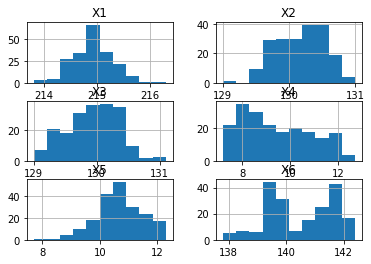

In [6]:
df.hist()
plt.show()

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [ ]:
#1.2 Matriz de covarianzas
df.cov()

,X1,X2,X3,X4,X5,X6
X1,0.141793,0.031443,0.023091,-0.103246,-0.018541,0.084306
X2,0.031443,0.130339,0.108427,0.215803,0.105039,-0.209342
X3,0.023091,0.108427,0.163274,0.284132,0.129997,-0.240470
X4,-0.103246,0.215803,0.284132,2.086878,0.164539,-1.036996
X5,-0.018541,0.105039,0.129997,0.164539,0.644723,-0.549615
X6,0.084306,-0.209342,-0.240470,-1.036996,-0.549615,1.327716


In [ ]:
#1.3 Matriz de correlaciones
df.corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.231293,0.151763,-0.189801,-0.061321,0.194301
X2,0.231293,1.000000,0.743263,0.413781,0.362350,-0.503229
X3,0.151763,0.743263,1.000000,0.486758,0.400670,-0.516476
X4,-0.189801,0.413781,0.486758,1.000000,0.141851,-0.622983
X5,-0.061321,0.362350,0.400670,0.141851,1.000000,-0.594045
X6,0.194301,-0.503229,-0.516476,-0.622983,-0.594045,1.000000


In [24]:
#1.4 Tipos -----> dfv : verdadero , dff= falso
dfv = DF[DF.X7 == 'verdadero'].iloc[:, [0,1,2,3,4,5]]
dff = DF[DF.X7 == 'falso'].iloc[:, [0,1,2,3,4,5]]

In [35]:
#matrices de cov y corr
dfv.cov(), dff.cov()#, dfv.corr(),dff.corr()

(          X1        X2        X3        X4        X5        X6
 X1  0.150241  0.058013  0.057293  0.057126  0.014453  0.005482
 X2  0.058013  0.132577  0.085899  0.056652  0.049067 -0.043062
 X3  0.057293  0.085899  0.126263  0.058182  0.030646 -0.023778
 X4  0.057126  0.056652  0.058182  0.413207 -0.263475 -0.000187
 X5  0.014453  0.049067  0.030646 -0.263475  0.421188 -0.075309
 X6  0.005482 -0.043062 -0.023778 -0.000187 -0.075309  0.199809,
           X1        X2        X3        X4        X5        X6
 X1  0.124011  0.031515  0.024001 -0.100596  0.019435  0.011566
 X2  0.031515  0.065051  0.046768 -0.024040 -0.011919 -0.005051
 X3  0.024001  0.046768  0.088940 -0.018576  0.000132  0.034192
 X4 -0.100596 -0.024040 -0.018576  1.281313 -0.490192  0.238485
 X5  0.019435 -0.011919  0.000132 -0.490192  0.404456 -0.022071
 X6  0.011566 -0.005051  0.034192  0.238485 -0.022071  0.311212)

In [ ]:
#EJR.2 TOMO MUESTRA ALEATORIA DE TAMANIO 25
d=df.iloc[:, [0,1,2,3,4,5]].sample(25)

In [ ]:
#Creo una función:mahal (Distancia de Mahalanobis)
def mahal(x,d):
  x1=x-d.mean()
  cov=pow(d.cov(),-1)
  mah=np.dot(np.dot(x1,cov),x1)
  return np.sqrt(abs(mah))

In [ ]:
# 2.1 Distancia_cuadrada de mahal de la muestra
dist_2=[mahal(muestra.iloc[i,:],muestra)**2 for i in range(0,len(d))]
print(dist_2)

[53.461712408321866, 129.1551856187325, 119.30009382448948, 15.941026363131286, 27.333596052472366, 8.416584646807214, 36.118356255157146, 11.145450893131796, 63.894440291331875, 128.1475303152336, 8.584062817706206, 51.12617304965674, 3.926469824481676, 63.05302482724405, 34.09144491953495, 40.60464755203701, 15.778694402541152, 67.54670524302742, 47.36097122805794, 22.959803427349502, 7.562691793869255, 39.16882559191588, 54.098638839800486, 10.219618932690032, 10.446885166129263]


In [ ]:
# 2.2 Distancia de mahal de la muestra oredenada ascendentemente
dist_=[mahal(muestra.iloc[i,:],muestra) for i in range(0,len(d))]
print(sorted(dist_))

[1.9815321911292978, 2.7500348713914984, 2.9011350618003315, 2.9298571326442193, 3.1968138720748245, 3.2321641613830914, 3.338480326905012, 3.9722404764239982, 3.99262149009035, 4.791638908280705, 5.228154172599768, 5.838787966653263, 6.0098549279626665, 6.258500266990159, 6.372177614602171, 6.881930777627594, 7.150256852005859, 7.311751664842144, 7.35517768920646, 7.940593480795, 7.99339979553956, 8.218680261637353, 10.922458231757606, 11.320226601761716, 11.364646304163298]
